In [45]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # adds the parent folder to the path56

In [51]:
import importlib
import etl_pipeline.clean
importlib.reload(etl_pipeline.clean)

<module 'etl_pipeline.clean' from 'C:\\Users\\LENOVO\\Documents\\ComplianceRiskRadar\\etl_pipeline\\clean.py'>

In [61]:
import etl_pipeline.clean as clean
import importlib
import pandas as pd
importlib.reload(clean)

# Load data - adjust paths if needed
users_raw = pd.read_csv('../Data/users.csv')
transactions_raw = pd.read_csv('../Data/transactions.csv')

# Clean data
users_clean = clean.clean_users(users_raw)
transactions_clean = clean.clean_transactions(transactions_raw)

print("Clean users columns:", users_clean.columns.tolist())
print("Clean transactions columns:", transactions_clean.columns.tolist())

Clean users columns: ['user_id', 'country', 'kyc_status', 'account_age_days', 'device_count', 'ip_risk_score']
Clean transactions columns: ['transaction_id', 'user_id', 'timestamp', 'tx_type', 'amount_usd', 'counterparty_country']


In [75]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Add project root to sys.path

import pandas as pd
import importlib

# Import from etl_pipeline
import etl_pipeline.clean as clean
import etl_pipeline.feature_engineering as feature_engineering

# Reload for dev work (optional)
importlib.reload(clean)
importlib.reload(feature_engineering)

# Load data
users_raw = pd.read_csv('../Data/users.csv')
transactions_raw = pd.read_csv('../Data/transactions.csv')

# Clean data
users_clean = clean.clean_users(users_raw)
transactions_clean = clean.clean_transactions(transactions_raw)

# Feature engineering
users_fe = feature_engineering.add_features(users_clean, transactions_clean)

# Confirm
print("Users with features columns:", users_fe.columns.tolist())

Users with features columns: ['user_id', 'country', 'kyc_status', 'account_age_days', 'device_count', 'ip_risk_score']


In [79]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Add project root to sys.path

import pandas as pd
import importlib

# Import from etl_pipeline
import etl_pipeline.clean as clean
import etl_pipeline.feature_engineering as feature_engineering

# Reload for dev work (optional)
importlib.reload(clean)
importlib.reload(feature_engineering)

# Load data
users_raw = pd.read_csv('../Data/users.csv')
transactions_raw = pd.read_csv('../Data/transactions.csv')

# Clean data
users_clean = clean.clean_users(users_raw)
transactions_clean = clean.clean_transactions(transactions_raw)

# Feature engineering
users_fe = feature_engineering.add_features(users_clean, transactions_clean)

# Confirm
print("Users with features columns:", users_fe.columns.tolist())

Users with features columns: ['user_id', 'country', 'kyc_status', 'account_age_days', 'device_count', 'ip_risk_score']


In [95]:
# Imports
import importlib
import etl_pipeline.anomaly_detection as anomaly_detection
importlib.reload(anomaly_detection)

# Apply anomaly detection
users_with_anomalies = anomaly_detection.detect_anomalies(users_fe)

# Show summary
print("Total users:", len(users_with_anomalies))
print("Anomalies detected:", users_with_anomalies['is_anomaly'].sum())

# Optional: view top anomalies by severity
anomalies = users_with_anomalies[users_with_anomalies['is_anomaly']]
anomalies_sorted = anomalies.sort_values('anomaly_score')
display(anomalies_sorted[['user_id', 'anomaly_score', 'avg_transaction_amount', 'ip_risk_score']].head(10))

Total users: 1000
Anomalies detected: 50


,user_id,anomaly_score,avg_transaction_amount,ip_risk_score
591,u0591,-0.125095,5267.352000,0.91
412,u0412,-0.113132,4463.200000,0.19
755,u0755,-0.098670,3448.805000,0.25
134,u0134,-0.087720,2508.955000,0.03
899,u0899,-0.086610,3412.790000,0.11
152,u0152,-0.080125,3191.154000,0.39
144,u0144,-0.075542,2020.808000,0.23
859,u0859,-0.074333,720.958571,0.88
140,u0140,-0.071066,858.511667,0.38
94,u0094,-0.056846,2789.529231,0.89


In [97]:
importlib.reload(anomaly_detection)

users_with_anomalies = anomaly_detection.detect_anomalies(users_fe)

# Preview the results
users_with_anomalies[['user_id', 'anomaly_score', 'is_anomaly']].head()

,user_id,anomaly_score,is_anomaly
0,u0000,0.143493,False
1,u0001,0.111883,False
2,u0002,0.151671,False
3,u0003,0.055223,False
4,u0004,0.123780,False


In [99]:
users_fe[[
    'total_transaction_amount', 
    'transaction_count', 
    'avg_transaction_amount', 
    'std_transaction_amount', 
    'unique_counterparty_countries', 
    'days_since_last_tx'
]].describe()

,total_transaction_amount,transaction_count,avg_transaction_amount,std_transaction_amount,unique_counterparty_countries,days_since_last_tx
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,104563.379620,52.494000,1990.643320,1940.317764,9.360000,4.712000
std,56737.688308,27.328791,375.610300,512.130835,1.340969,8.022682
min,5046.710000,5.000000,720.958571,324.883792,3.000000,0.000000
25%,57508.800000,30.000000,1775.569796,1618.655359,9.000000,1.000000
50%,102771.090000,53.000000,1989.650557,1905.796514,10.000000,2.000000
75%,152952.280000,76.000000,2171.121569,2192.065201,10.000000,5.000000
max,240458.960000,99.000000,5267.352000,8010.746468,10.000000,70.000000


In [101]:
users_with_anomalies = anomaly_detection.detect_anomalies(users_fe, contamination=0.05)

In [103]:
users_with_anomalies['is_anomaly'].value_counts()

is_anomaly
False    950
True      50
Name: count, dtype: int64

In [105]:
anomalies = users_with_anomalies[users_with_anomalies['is_anomaly'] == True]
print(anomalies[['user_id', 'total_transaction_amount', 'avg_transaction_amount', 
                 'std_transaction_amount', 'unique_counterparty_countries', 'days_since_last_tx']])

    user_id  total_transaction_amount  avg_transaction_amount  \
14    u0014                  20928.06             2325.340000   
26    u0026                  45798.96             3053.264000   
58    u0058                  16819.61             1121.307333   
90    u0090                  28584.62             2598.601818   
94    u0094                  36263.88             2789.529231   
125   u0125                  34682.52             2477.322857   
134   u0134                  15053.73             2508.955000   
135   u0135                  14333.96             1592.662222   
140   u0140                   5151.07              858.511667   
144   u0144                  10104.04             2020.808000   
152   u0152                  15955.77             3191.154000   
196   u0196                  60181.27             3343.403889   
213   u0213                  11565.75             1927.625000   
222   u0222                  18048.76             1640.796364   
235   u0235              

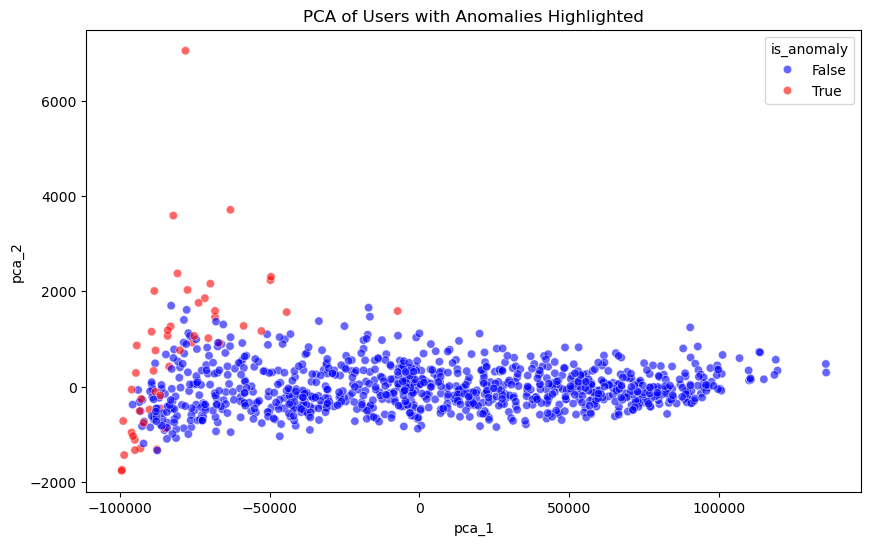

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select feature columns
feature_cols = [
    'total_transaction_amount', 'transaction_count', 'avg_transaction_amount',
    'std_transaction_amount', 'unique_counterparty_countries', 'days_since_last_tx'
]
X = users_with_anomalies[feature_cols].fillna(0)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add to DataFrame for plotting
users_with_anomalies['pca_1'] = pca_result[:, 0]
users_with_anomalies['pca_2'] = pca_result[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=users_with_anomalies,
    x='pca_1',
    y='pca_2',
    hue='is_anomaly',
    palette={True: 'red', False: 'blue'},
    alpha=0.6
)
plt.title('PCA of Users with Anomalies Highlighted')
plt.show()

In [109]:
anomalies.to_csv("flagged_anomalies.csv", index=False)

In [111]:
import sys
sys.path.append('../etl_pipeline')  # So you can import your modules easily

import pandas as pd
from feature_engineering import add_features
from anomaly_detection import detect_anomalies

# Load data
users_df = pd.read_csv('../data/users.csv')
transactions_df = pd.read_csv('../data/transactions.csv')

# Feature engineering
users_fe = add_features(users_df, transactions_df)

# Detect anomalies
users_with_anomalies = detect_anomalies(users_fe)

# Save processed data for dashboard or other use
users_with_anomalies.to_csv('../data/processed_users.csv', index=False)

print("Saved processed users with features and anomalies to data/processed_users.csv")

Saved processed users with features and anomalies to data/processed_users.csv


In [113]:
import os

print("Working directory:", os.getcwd())
print("Full path exists:", os.path.exists("../Data/processed_users.csv"))

Working directory: C:\Users\LENOVO\Documents\ComplianceRiskRadar\notebooks
Full path exists: True
